In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import keras
import tensorflow as tf

2024-04-23 12:55:23.010237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 12:55:23.010378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 12:55:23.208253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "not available")
print("TensorFlow version:", tf.__version__)

GPU is not available
TensorFlow version: 2.15.0


In [3]:
df = pd.read_csv('/kaggle/input/tiki-books-dataset/comments.csv')
df.sample(5)

,product_id,comment_id,title,thank_count,customer_id,rating,content
59924,48481763,16888939,Cực kì hài lòng,1,7193137,5,sách hay. thiên về triết học. đọc hơi khó hiểu...
49450,81437585,14431736,Cực kì hài lòng,0,19554856,5,Sách tốt lắm nha. Bìa đẹp ghê luôn á✨☄️
47670,202650475,18300040,Cực kì hài lòng,0,7915390,5,NaN
8087,120219394,16081839,Cực kì hài lòng,0,10327781,5,Sách in chất lượng tốt. Vận chuyển nhanh.
21385,197629358,18370631,Hài lòng,0,28335429,4,NaN


In [4]:
df = df[['rating', 'content']]

print(len(df))
df.sample(5)

141281


,rating,content
70131,5,Tốt
65849,4,Sách đóng gói bao bì rất chuẩn và đẹp. Tuy chỉ...
81691,5,"sách rất đẹp, giấy dày, màu đẹp. cuốn sách ch..."
44756,3,Chất lượng giấy tập này cầm khá tệ và không cò...
38637,5,"Sách đẹp lắm ạ, con nguyên seal luôn ☺️☺️☺️☺️\..."


In [5]:
df.isna().sum()

rating         0
content    38018
dtype: int64

In [6]:
df.dropna(inplace=True)
len(df)

103263

<Axes: xlabel='rating', ylabel='count'>

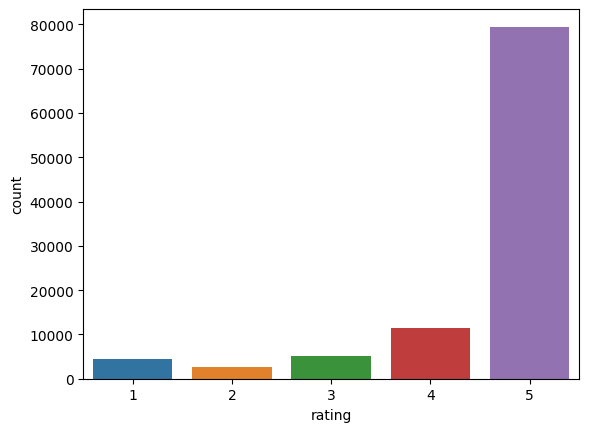

In [7]:
import seaborn as sns

sns.countplot(data=df, x='rating')

In [8]:
X = df.content.copy()
y = df.rating.copy()

print(X[0])

Có những người bước đến, họ lấp đầy hạnh phúc vào từng vết nứt trong tim, khiến chúng được an ủi và chữa lành. Nhưng rồi họ lại ra đi, làm tan vỡ trái tim người ở lại….
Câu chuyện bắt đầu bằng sự vui vẻ, nghịch ngợm của một cậu bé mang tên Zezé và kết thúc là một nỗi đau tột cùng khi mất đi hai người bạn quý giá nhất đời mình.
Khi đọc cuốn tiểu thuyết này, các bạn hẳn sẽ nhiều lần đau xót vì thương cảm cho cậu bé chỉ mới 5 tuổi với một tuổi thơ nhiều rạn vỡ. Nhưng các bạn cũng sẽ mỉm cười và cảm thấy yêu thương sự sống từ trong sâu thẳm tim mình. Bởi trong suốt cuốn tiểu thuyết, người với người đối xử với nhau vẫn rất đỗi dịu dàng, yêu thương và trìu mến. Cho đến khi khép lại cuốn sách, thì trái tim chúng ta lại thổn thức với một nỗi buồn vương vấn, buồn cho sự mất mát từ những yêu thương và buồn cho sự trưởng thành từ những nỗi đau, sự trưởng thành quá sớm mà không ai mong muốn…
Một cuốn tự truyện đầy cảm động, tuy đau đớn nhưng vẫn ngập tràn tình yêu thương!!!
Cảm ơn Tiki 🧡


In [9]:
import re

def preprocessing(text):
    text = text.strip().lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r"^([^ \w])(?!\s)", r"\1 ", text)
    text = re.sub(r"(\s[^ \w])(?!\s)", r"\1 ", text)
    text = re.sub(r"(?!\s)([^ \w])$", r" \1", text)
    text = re.sub(r"(?!\s)([^ \w]\s)", r" \1", text)
    
    return text

preprocessed_X = []

for text in X:
    preprocessed_text = preprocessing(text)
    preprocessed_X.append(preprocessed_text)

In [10]:
preprocessed_X[0]

'có những người bước đến , họ lấp đầy hạnh phúc vào từng vết nứt trong tim , khiến chúng được an ủi và chữa lành . nhưng rồi họ lại ra đi , làm tan vỡ trái tim người ở lại… . câu chuyện bắt đầu bằng sự vui vẻ , nghịch ngợm của một cậu bé mang tên zezé và kết thúc là một nỗi đau tột cùng khi mất đi hai người bạn quý giá nhất đời mình . khi đọc cuốn tiểu thuyết này , các bạn hẳn sẽ nhiều lần đau xót vì thương cảm cho cậu bé chỉ mới 5 tuổi với một tuổi thơ nhiều rạn vỡ . nhưng các bạn cũng sẽ mỉm cười và cảm thấy yêu thương sự sống từ trong sâu thẳm tim mình . bởi trong suốt cuốn tiểu thuyết , người với người đối xử với nhau vẫn rất đỗi dịu dàng , yêu thương và trìu mến . cho đến khi khép lại cuốn sách , thì trái tim chúng ta lại thổn thức với một nỗi buồn vương vấn , buồn cho sự mất mát từ những yêu thương và buồn cho sự trưởng thành từ những nỗi đau , sự trưởng thành quá sớm mà không ai mong muốn … một cuốn tự truyện đầy cảm động , tuy đau đớn nhưng vẫn ngập tràn tình yêu thương!! ! cảm

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.1, shuffle=True)

print(len(X_train))
print(len(X_test))

92936
10327


In [12]:
y_train = np.array(y_train) - 1

In [13]:
from keras.layers import TextVectorization

vocab_size = 10000
max_len = 200

vectorizer = TextVectorization(
    max_tokens = vocab_size,
    standardize=None,
    split='whitespace',
    output_mode='int',
    output_sequence_length = max_len
)

vectorizer.adapt(X_train)

X_train_vectors = vectorizer(X_train)
X_test_vectors = vectorizer(X_test)

print(X_train_vectors[0])

tf.Tensor(
[1150  264 1267  253 2182  217  500   19   77  822    2  557   98    3
    3    4   23    2  157    6  880 2306   16    6  584  312  667    4
   10   57  165  427  106  140   25    2   61    9   30   29   16  185
  345   62   15   66  131   10    4  388  234    2  115   27    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [14]:
import numpy as np

def pos_enc_matrix(max_len, embed_dim, n=10000):
    assert embed_dim % 2 == 0
    
    d2 = embed_dim / 2
    P = np.zeros((max_len, embed_dim))
    k = np.arange(max_len).reshape(-1, 1)
    i = np.arange(d2).reshape(1, -1)
    denom = np.power(n, -i/d2)
    args = k * denom
    
    P[:, ::2] = np.sin(args)
    P[:, 1::2] = np.cos(args)
    
    return P

In [15]:
class PositionalEmbedding(keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        
        self.token_embeddings = keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        matrix = pos_enc_matrix(max_len, embed_dim)
        self.position_embeddings = tf.constant(matrix, dtype='float32')
        
        self.max_len = max_len
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        
    def call(self, inputs):
        embedded_tokens = self.token_embeddings(inputs)
        
        return embedded_tokens + self.position_embeddings

In [16]:
vocab_size = 10000
max_len = 200
embed_dim = 512

embed_en = PositionalEmbedding(max_len, vocab_size, embed_dim)

embed_text = embed_en(X_train_vectors[0])
print(embed_text.shape)
print(embed_text)

(200, 512)
tf.Tensor(
[[ 0.03507402  1.0135988  -0.04236159 ...  1.0449919   0.03965969
   0.95972896]
 [ 0.87410444  0.55817306  0.8536073  ...  0.99103016  0.00662533
   0.9807226 ]
 [ 0.8810433  -0.4548873   0.920034   ...  1.0409989   0.02229511
   1.007213  ]
 ...
 [ 0.75915474 -0.5571016   1.0258163  ...  1.0384556   0.0669505
   0.9956307 ]
 [-0.11622975 -0.9483784   0.6187027  ...  1.0384533   0.06705414
   0.99562854]
 [-0.91845    -0.42317545 -0.2983171  ...  1.0384511   0.06715778
   0.9956264 ]], shape=(200, 512), dtype=float32)


In [17]:
def scaled_dot_product_attention(q, k, v):
    d_k = tf.cast(tf.shape(k)[-1], tf.float32)
    scores = tf.matmul(q, k, transpose_b=True)
    scaled_scores = scores / tf.math.sqrt(d_k)
    weights = tf.nn.softmax(scaled_scores, axis=-1)
    output = tf.matmul(weights, v)
    
    return output

In [18]:
class MultiHeadAttention(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        
        self.q_linear = keras.layers.Dense(embed_dim)
        self.k_linear = keras.layers.Dense(embed_dim)
        self.v_linear = keras.layers.Dense(embed_dim)
        self.concat_linear = keras.layers.Dense(embed_dim)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, shape=(batch_size, -1, self.num_heads, 
                                self.embed_dim // self.num_heads))
        
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def concat_heads(self, x, batch_size):
        x = tf.transpose(x, perm=[0, 1, 2, 3])
        
        return tf.reshape(x, (batch_size, -1, self.embed_dim))
    
    def call(self, q, k, v):
        batch_size = tf.shape(k)[0]
        q = self.q_linear(q)
        k = self.q_linear(k)
        v = self.q_linear(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        attention = scaled_dot_product_attention(q, k, v)
        concat = self.concat_heads(attention, batch_size)
        concat = self.concat_linear(concat)
        
        return concat

In [19]:
class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super().__init__()
        self.att = MultiHeadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.feed_forward = keras.Sequential([
            keras.layers.Dense(ff_dim, activation='relu'),
            keras.layers.Dense(embed_dim)
        ])
        self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = keras.layers.Dropout(dropout_rate)
        self.dropout2 = keras.layers.Dropout(dropout_rate)
        
    def call(self, inputs):
        x = inputs
        attn_output = self.att(q=x, k=x, v=x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.feed_forward(out1)
        ffn_output = self.dropout2(ffn_output)
        
        return self.layernorm2(out1 + ffn_output)

In [20]:
embed_dim = 64
num_heads = 2
ff_dim = 64
max_len = 200
vocab_size = 20000
dropout_rate = 0.1

inputs = keras.layers.Input(shape=(max_len, ))
embedding_layer = PositionalEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
x = transformer_block(x)
x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dropout(dropout_rate)(x)
x = keras.layers.Dense(20, activation='relu')(x)
x = keras.layers.Dropout(dropout_rate)(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_1          │ (None, 200, 64)        │     1,280,000 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 200, 64)        │        16,896 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,298,301 (4.95 MB)

 Trainable params: 1,298,301 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
history = model.fit(X_train_vectors, y_train, 
                    batch_size=32,
                    epochs=3)

Epoch 1/3
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 240s 81ms/step - accuracy: 0.7696 - loss: 0.7620
Epoch 2/3
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 264s 82ms/step - accuracy: 0.7938 - loss: 0.5738
Epoch 3/3
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 258s 81ms/step - accuracy: 0.8043 - loss: 0.5390


In [23]:
y_test = np.array(y_test) - 1

pred = model.predict(X_test_vectors)

pred_classes = np.argmax(pred, axis=1)

accuracy = np.mean(pred_classes == y_test)

accuracy

323/323 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


0.8014912365643458

In [24]:
def classification(text):
    text = preprocessing(text)
    vector = vectorizer([text])
    
    pred = model.predict(vector)
    
    pred_classes = np.argmax(pred, axis=1)
    
    return pred_classes[0] + 1

In [25]:
text = X_test[np.random.randint(len(X_test))]

print(text)
classification(text)

sách hay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


5